#### Name: Aamir Husain

# Deep learning from scratch
## Homework 2
### Exercise 1

-----

### General instructions

Complete the exercise listed below in this Jupyter notebook - leaving all of your code in Python cells in the notebook itself.  Feel free to add any necessary cells. 

### When submitting this homework:

Make sure you have put your name at the top of each file
    
Make sure all output is present in your notebook prior to submission

----

In [1]:
# import necessary library for this exercise
import autograd.numpy as np   
from autograd import value_and_grad 
import matplotlib.pyplot as plt

## <span style="color:#a50e3e;">Exercise 1. </span>  Normalizing the input of a student debt dataset (10 points)

In this exercise you will repeat the experiment shown in [Example 1 of Section 8.4 of the class notes](https://jermwatt.github.io/mlrefined/blog_posts/8_Linear_regression/8_4_feature_scaling.html) where standard normalization was shown to enormously improve our ability to perform linear regression using gradient descent on the following student loan dataset.

In [2]:
# data input
csvname = 'data/student_debt.csv'
data = np.loadtxt(csvname,delimiter = ',')

# get input and output of dataset
x = data[:,:-1].T
y = data[:,-1:]

# scatter plot the input data
# plt.figure()
# plt.scatter(x,y,color = 'k',edgecolor = 'w')
# plt.show()

Compare a run of gradient descent using a maximum of $100$ iterations on the original input, to one run when using standard normalized input, where both runs are initialized at the point $\mathbf{w} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$. Note here that you will likely not achieve any kind of meaningful convergence when minimizing the cost over the original input (as detailed in the example), but for the standard normalized input you can definitely achieve convergence by properly tuning the steplength parameter. Plot and compare the fit of each run on the original dataset.

Note that you do **not** need to produce the contour plots shown in the notes.

**Remember:** as described in the notes, in evaluating any new test input of a model (learned on normalized training data) you need to normalize the test input precisely the way you did the training data.

**Note:** you can re-use a good amount of the code from the previous homework here - e.g., the cost function plotter you made, the line fitting, etc.

In [3]:
# Define all necessary functions

# Gradient descent - inputs: g (input function), alpha (steplength parameter), max_its (maximum number of iterations), w (initialization)
def gradient_descent(g,alpha_choice,max_its,w):
    gradient = value_and_grad(g)

    # run the gradient descent loop
    weight_history = []      # container for weight history
    cost_history = []        # container for corresponding cost function history
    alpha = 0
    for k in range(1,max_its+1):
        # check if diminishing steplength rule used
        if alpha_choice == 'diminishing':
            alpha = 1/float(k)
        else:
            alpha = alpha_choice
        
        # evaluate the gradient, store current weights and cost function value
        cost_eval,grad_eval = gradient(w)
        weight_history.append(w)
        cost_history.append(cost_eval)

        # take gradient descent step
        w = w - alpha*grad_eval
            
    # collect final weights
    weight_history.append(w)
    # compute final cost function value via g itself (since we aren't computing 
    # the gradient at the final step we don't get the final cost function value 
    # via the Automatic Differentiatoor) 
    cost_history.append(g(w))  
    return weight_history,cost_history

# Linear combination of input points
def model(x,w):
    a = w[0] + np.dot(x.T,w[1:])
    return a.T

# Least squares cost function for linear regression
def least_squares(w):    
    # compute the least squares cost
    cost = np.sum((model(x,w).T - y)**2)
    return cost/float(np.size(y))

# Standard normalization function 
def standard_normalizer(x):
    # compute the mean and standard deviation of the input
    x_means = np.mean(x,axis = 1)[:,np.newaxis]
    x_stds = np.std(x,axis = 1)[:,np.newaxis]   

    # check to make sure thta x_stds > small threshold, for those not
    # divide by 1 instead of original standard deviation
    ind = np.argwhere(x_stds < 10**(-2))
    if len(ind) > 0:
        ind = [v[0] for v in ind]
        adjust = np.zeros((x_stds.shape))
        adjust[ind] = 1.0
        x_stds += adjust

    # create standard normalizer function
    normalizer = lambda data: (data - x_means)/x_stds

    # create inverse standard normalizer
    inverse_normalizer = lambda data: data*x_stds + x_means

    # return normalizer 
    return normalizer,inverse_normalizer

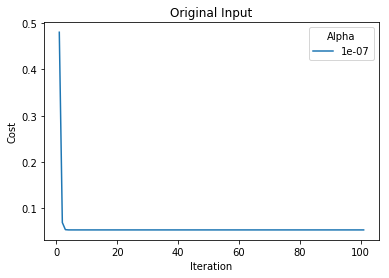

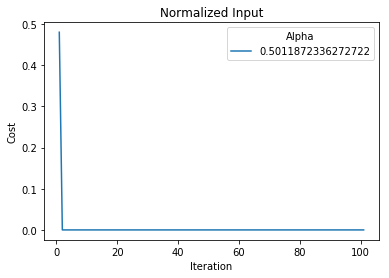

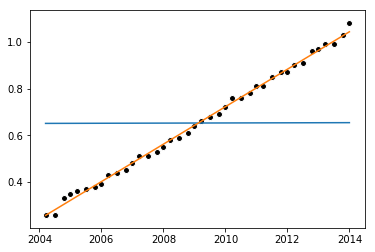

In [4]:
# Duplicate orginal data set for later plotting
x_orig = x

# Create a cost function to pass to gradient descent method
g = lambda w: least_squares(w)

## Gradient descent for original input
gamma = 7
a = 10**(-gamma)
iterations = 100
w0 = np.array([[0.0,0.0]]).T
weights, costs = gradient_descent(g, a, iterations, w0)

# Plot cost
plt.figure()
plt.plot(np.linspace(1,iterations+1,iterations+1), costs, label = a)
plt.title("Original Input")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(title = "Alpha", loc = "upper right")
plt.show

# Find weights & generate best fit line
minimum = min(costs)
index = costs.index(minimum)
minimizer = weights[index]
yp = model(x_orig, minimizer)

## Gradient descent for normalized input
normalizer,inverse_normalizer = standard_normalizer(x)
x = normalizer(x)

gamma = .3
a = 10**(-gamma)
iterations = 100
w0 = np.array([[0.0,0.0]]).T
weights, costs = gradient_descent(g, a, iterations, w0)

# Plot cost
plt.figure()
plt.plot(np.linspace(1,iterations+1,iterations+1), costs, label = a)
plt.title("Normalized Input")
plt.xlabel("Iteration")
plt.ylabel("Cost")
plt.legend(title = "Alpha", loc = "upper right")
plt.show

# Find weights & generate best fit line
minimum = min(costs)
index = costs.index(minimum)
minimizer = weights[index]
yp_norm = model(x, minimizer)

plt.figure()
plt.scatter(x_orig,y,color = 'k',edgecolor = 'w')
plt.plot(x_orig[0],yp[0])
plt.plot(x_orig[0],yp_norm[0])
plt.show()